# Lending Club Loan Prediction

### We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### The special version of the file with some extra features is given by Pierian Data Inc. This data set is used other than original for the project and copyrights to Pierian Data Inc.

## Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.



### Loading data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
df_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
df_info['Description']

LoanStatNew
loan_amnt               The listed amount of the loan applied for by t...
term                    The number of payments on the loan. Values are...
int_rate                                        Interest Rate on the loan
installment             The monthly payment owed by the borrower if th...
grade                                              LC assigned loan grade
sub_grade                                       LC assigned loan subgrade
emp_title               The job title supplied by the Borrower when ap...
emp_length              Employment length in years. Possible values ar...
home_ownership          The home ownership status provided by the borr...
annual_inc              The self-reported annual income provided by th...
verification_status     Indicates if income was verified by LC, not ve...
issue_d                               The month which the loan was funded
loan_status                                    Current status of the loan
purpose                 A 

In [5]:
df_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

#### Lets create a function that returns description of the corresponding feature

In [6]:
def feature_des(name):
    return df_info.loc[name]['Description']

In [7]:
feature_des('mort_acc')

'Number of mortgage accounts.'

### let us focus on loan_status

In [8]:
df=pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

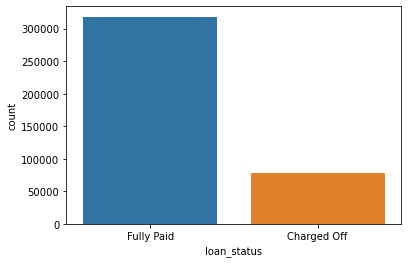

In [11]:
sns.countplot(x='loan_status',data=df)

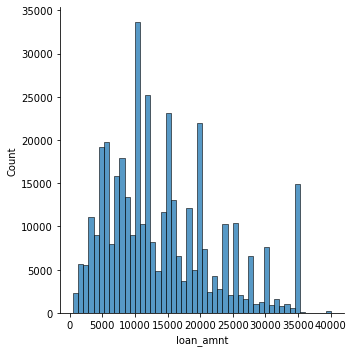

In [12]:
sns.displot(df['loan_amnt'],kde=False,bins=50)

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

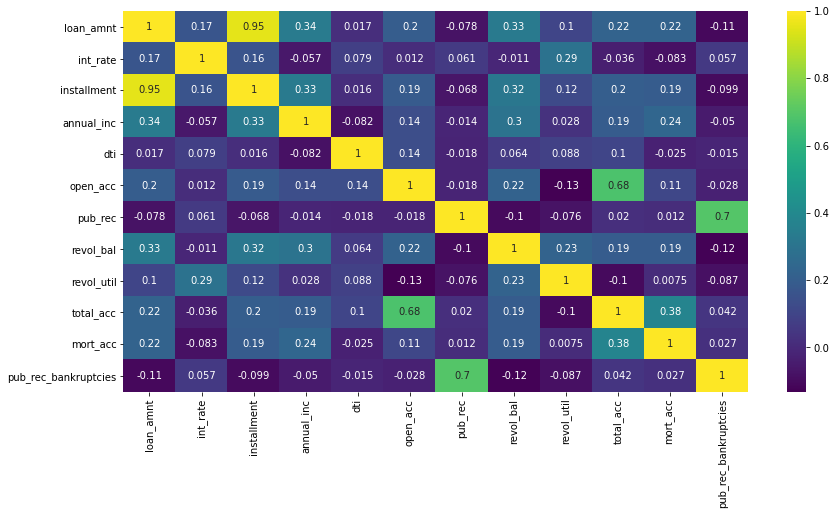

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### we can see that there is almost perfect corelation between 'loan_amnt' and 'installment'

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

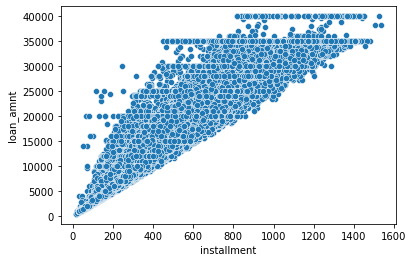

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

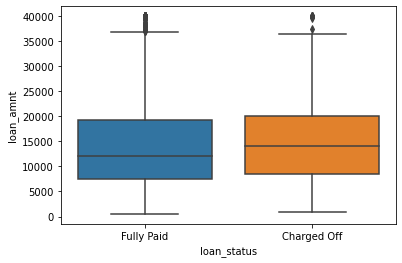

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


##### It make sence that mean of charged_off is greater than fully_paid, generally pepole cannot pay back because amount is high.

In [18]:
print(feature_des('grade'))
print(feature_des('sub_grade'))

LC assigned loan grade
LC assigned loan subgrade


In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

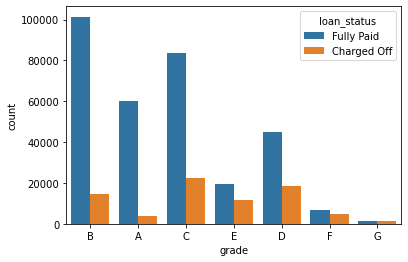

In [21]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

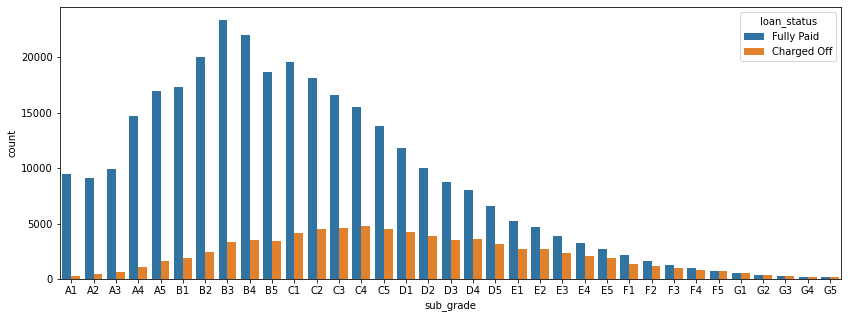

In [22]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=sorted(df['sub_grade'].unique()))

#### F and G grdaes have almost equal number of charged_off and fully_paid rates, so lets explore F and G grades

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

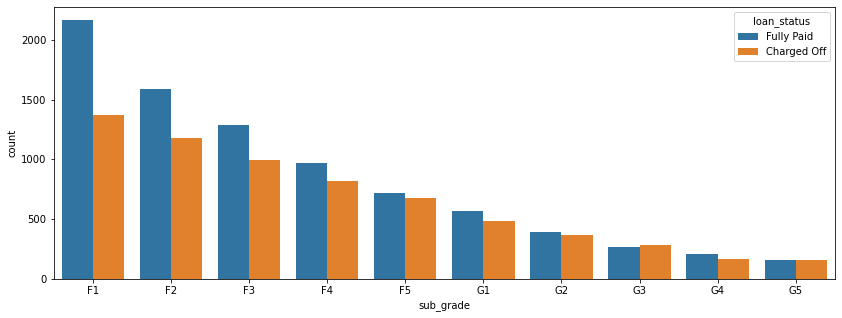

In [23]:
F_G=df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=F_G,hue='loan_status',order=sorted(F_G['sub_grade'].unique()))

#### For easy evaluation lets map fully_paid to 1 and charged _off to 0

In [24]:
df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [25]:
df['loan_paid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<AxesSubplot:>

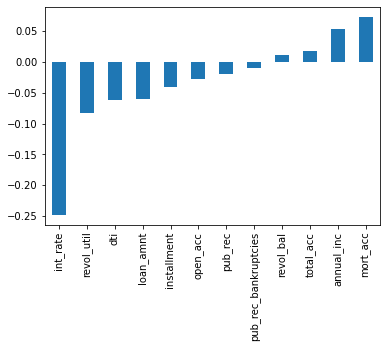

In [27]:
df.corr()['loan_paid'].sort_values().drop('loan_paid').plot(kind='bar')

##### Dealing with missing data

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

In [29]:
feature_des('emp_title')

'The job title supplied by the Borrower when applying for the loan.*'

In [30]:
df['emp_title'].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
                                           ... 
Cast  and  Crew                               1
Insight Technology Solutions                  1
Bay Alarm Company                             1
International cruise & excursions, inc.       1
Sr. Business Manager, IT                      1
Name: emp_title, Length: 173105, dtype: int64

In [31]:
df.drop('emp_title',axis=1,inplace=True)

In [32]:
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

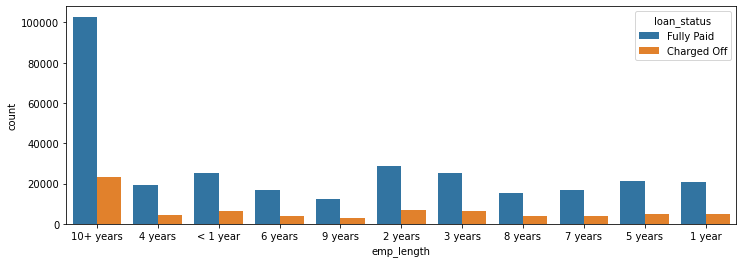

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,hue='loan_status')

#### it seems like ratio of fully paid and charged off is all most same in every category of emp_length, so lets drop emp_length

In [34]:
df.drop('emp_length',axis=1,inplace=True)

In [35]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

In [36]:
feature_des('title')

'The loan title provided by the borrower'

In [37]:
feature_des('purpose')

'A category provided by the borrower for the loan request. '

In [38]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


#### title and purpose columns are both same ,lets drop title

In [39]:
df.drop('title',axis=1,inplace=True)

In [40]:
feature_des('mort_acc')

'Number of mortgage accounts.'

In [41]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

#### let us try to fill missing values in mort_acc column, for that we need corelation of mort_acc

In [42]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_paid               0.073111
Name: mort_acc, dtype: float64

#### total_acc has some positive corelation with mort_acc, so lets try to fill missing mort_acc values with average 'total_acc' values 

In [43]:
ave_acc=df.groupby('total_acc').mean()['mort_acc']

In [44]:
def fill_missing_mort(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return ave_acc[total_acc]
    else:
        return mort_acc

In [45]:
df['mort_acc']=df.apply(lambda x:fill_missing_mort(x['total_acc'],x['mort_acc']),axis=1)

In [46]:
df['mort_acc']=round(df['mort_acc'])

In [47]:
df['mort_acc'].value_counts()

0.0     145213
1.0      73906
2.0      62421
3.0      44417
4.0      27915
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [48]:
df=df.dropna()

In [49]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

### Categorical data

In [50]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [51]:
df.drop('grade',axis=1,inplace=True)

In [52]:
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [53]:
feature_des('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [54]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [55]:
df['term']=df['term'].apply(lambda term:int(term[:3]))

In [56]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [57]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [59]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [60]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [61]:
df['zip_code']=df['address'].apply(lambda address:int(address[-5:]))

In [62]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [63]:
df.drop('address',axis=1,inplace=True)

In [64]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [65]:
df.drop('issue_d',axis=1,inplace=True)

In [66]:
feature_des('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [67]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [68]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [69]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

In [70]:
dummies = pd.get_dummies(df[['sub_grade','home_ownership','verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['sub_grade','home_ownership','verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [71]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [74]:
df.drop('loan_status',axis=1,inplace=True)

In [75]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

### Train test split

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
X=df.drop('loan_paid',axis=1).values

In [79]:
y=df['loan_paid'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Normalizing the data

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler=MinMaxScaler()

In [84]:
X_train=scaler.fit_transform(X_train)

In [85]:
X_test=scaler.transform(X_test)

### Creating model

In [86]:
import tensorflow as tf

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

### lets take number of layers are equal to number of features in our case there are 71 features

In [88]:
df.shape

(395219, 71)

In [103]:
model=Sequential()
# input layer
model.add(Dense(71,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [104]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4753 - val_loss: 0.3679
Epoch 2/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3825 - val_loss: 0.3634
Epoch 3/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3704 - val_loss: 0.3393
Epoch 4/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3467 - val_loss: 0.3228
Epoch 5/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3260 - val_loss: 0.2854
Epoch 6/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2941 - val_loss: 0.2825
Epoch 7/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2907 - val_loss: 0.2824
Epoch 8/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2876 - val_loss: 0.2824
Epoch 9/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2864 - val_loss: 0.2817
Epoch 10/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.285

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save('loan_model.h5')

In [107]:
losses=pd.DataFrame(model.history.history)

In [108]:
losses

,loss,val_loss
0,0.430870,0.367898
1,0.379382,0.363366
2,0.365130,0.339336
3,0.343406,0.322810
4,0.314125,0.285442
5,0.294426,0.282476
6,0.289648,0.282404
7,0.287033,0.282402
8,0.286800,0.281706
9,0.285236,0.281603


<AxesSubplot:>

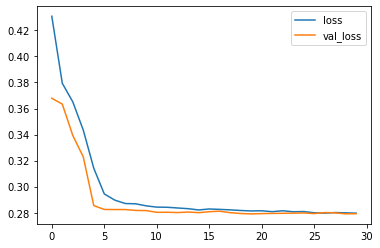

In [109]:
losses.plot()

In [110]:
predictions = model.predict_classes(X_test)

C:\Users\Thrinesh Duvvuru\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [113]:
confusion_matrix(y_test,predictions)

array([[ 6724,  8934],
       [    4, 63382]], dtype=int64)

### seems our model is good but not very good ,we can try changing layers ,epochos ,batchsize etc..

In [115]:
import random
random.seed(42)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_paid',axis=1).iloc[random_ind]
new_customer

loan_amnt                   22000.00
term                           36.00
int_rate                        6.62
installment                   675.49
annual_inc                  77431.00
                              ...   
purpose_other                   0.00
purpose_renewable_energy        0.00
purpose_small_business          0.00
purpose_vacation                0.00
purpose_wedding                 0.00
Name: 335936, Length: 70, dtype: float64

In [117]:
model.predict_classes(new_customer.values.reshape(1,70))

array([[1]])

#### did this person actually end up paying back their loan? lets check

In [119]:
df.iloc[random_ind]['loan_paid']

1.0